## Depricated, use spectrum.py instead

import all files in the folder

In [1]:
import matplotlib.pyplot as plt 

In [2]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

In [3]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [4]:
data_dict['sun-0001.fit']

array([[593, 554, 532, ..., 549, 537, 316],
       [541, 645, 507, ..., 619, 505, 294],
       [568, 601, 560, ..., 527, 517, 331],
       ...,
       [458, 484, 401, ..., 454, 458, 323],
       [430, 463, 447, ..., 387, 483, 292],
       [480, 468, 476, ..., 513, 430, 333]], dtype=uint16)

In [5]:
data_headers['sun-0001.fit']

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1391 /fastest changing axis                           
NAXIS2  =                 1039 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-11-12T08:53:57' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.47999999999999998 /Exposure time in seconds                        
EXPOSURE=  0.47999999999999998 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.020000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   6.45000000000000

In [6]:
data_headers['sun-0001.fit']['DATE-OBS']

'2021-11-12T08:53:57'

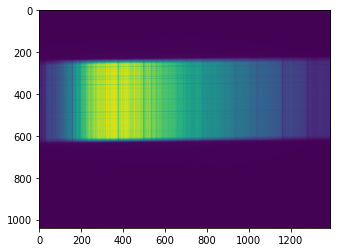

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['sun2-0001.fit'])

In [8]:
#plt.plot(data_dict['sun2-0001.fit'][0],data_dict['sun2-0001.fit'][1], '.')

## Stacking

import only sky-zenith files

In [9]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/20201109 sky zenith/"
files =  [ p for p in Path(path).glob('skyspectrum*') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [10]:
data_dict.keys()

dict_keys(['skyspectrum zenit-0001.fit', 'skyspectrum zenit-0002.fit', 'skyspectrum zenit-0003.fit', 'skyspectrum zenit-0004.fit', 'skyspectrum zenit-0005.fit', 'skyspectrum zenit-0006.fit', 'skyspectrum zenit-0007.fit', 'skyspectrum zenit-0008.fit', 'skyspectrum zenit-0009.fit', 'skyspectrum zenit-0010.fit', 'skyspectrum zenit-0011.fit', 'skyspectrum zenit-0012.fit', 'skyspectrum zenit-0013.fit', 'skyspectrum zenit-0014.fit', 'skyspectrum zenit-0015.fit', 'skyspectrum zenit-0016.fit', 'skyspectrum zenit-0017.fit', 'skyspectrum zenit-0018.fit', 'skyspectrum zenit-0019.fit', 'skyspectrum zenit-0020.fit'])

In [11]:
data_dict['skyspectrum zenit-0001.fit']

array([[450, 469, 479, ..., 424, 434, 341],
       [509, 469, 507, ..., 445, 444, 326],
       [476, 495, 446, ..., 443, 463, 298],
       ...,
       [469, 425, 388, ..., 418, 428, 318],
       [451, 437, 419, ..., 390, 463, 331],
       [489, 411, 483, ..., 408, 423, 316]], dtype=uint16)

In [12]:
import numpy as np
stack = np.median([ x for x in data_dict.values()], axis=0)

In [13]:
print(stack)

[[471.  484.5 474.5 ... 435.  443.  313. ]
 [475.  480.  480.  ... 434.  443.  303. ]
 [479.  497.  461.  ... 437.5 441.  309.5]
 ...
 [441.  447.  434.5 ... 422.5 419.  306.5]
 [447.  435.5 438.5 ... 422.  433.  308. ]
 [435.  430.  440.5 ... 422.5 423.5 309.5]]


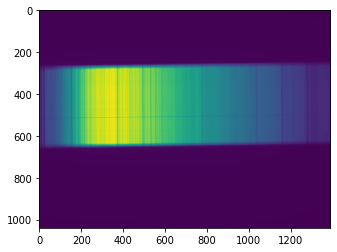

In [14]:
plt.imshow(stack)

In [15]:
len(stack[0])

1391

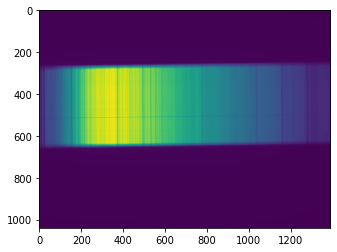

In [16]:
plt.imshow(stack)

cf. non-stacked image

In [17]:
#plt.imshow(data_dict['sun2-0001.fit'])

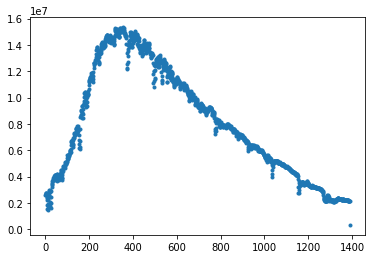

In [18]:
#plt.xlim(500,1000)
plt.plot(np.sum(stack[:], axis=0), '.')

Taking the mean can be done over the entire stack and still gives a valid spectrum unlike median.

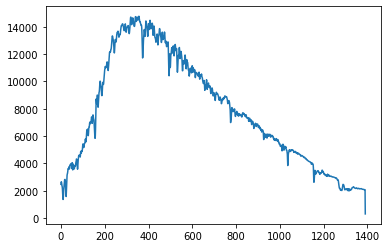

In [19]:
plt.plot(np.mean(stack[:], axis=0))

crop the stack

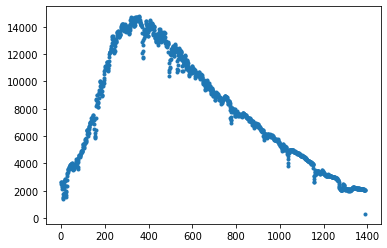

In [20]:
plt.plot(np.mean(stack[:], axis=0), '.')

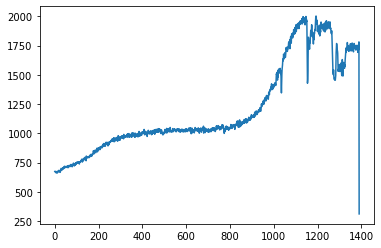

In [21]:
plt.plot(np.median(stack[0:500], axis=0))

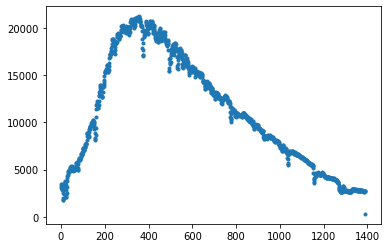

In [22]:
plt.plot(np.median(stack[0:750], axis=0), '.')

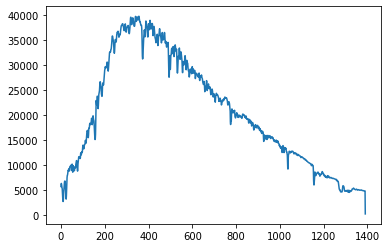

In [23]:
plt.plot(np.median(stack[300:800], axis=0))

In [24]:
print(len(stack))

1039


## Calibration

In [25]:
stack

array([[471. , 484.5, 474.5, ..., 435. , 443. , 313. ],
       [475. , 480. , 480. , ..., 434. , 443. , 303. ],
       [479. , 497. , 461. , ..., 437.5, 441. , 309.5],
       ...,
       [441. , 447. , 434.5, ..., 422.5, 419. , 306.5],
       [447. , 435.5, 438.5, ..., 422. , 433. , 308. ],
       [435. , 430. , 440.5, ..., 422.5, 423.5, 309.5]])

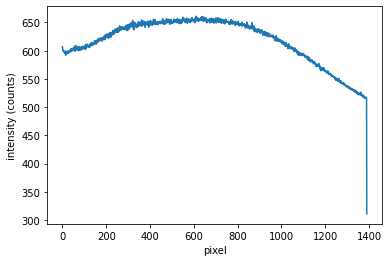

In [26]:
spectrum = np.median(stack[:], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intensity (counts)')
plt.plot(spectrum)

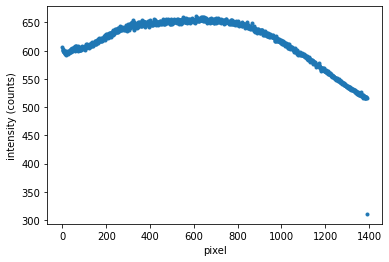

In [27]:
plt.xlabel('pixel')
plt.ylabel('intensity (counts)')
plt.plot(spectrum, '.')

In [28]:
import numpy as np
from scipy.signal import argrelextrema

minima = argrelextrema(spectrum, np.less)
len(minima[0])

416

In [29]:
for i in minima[0]:
    print(f'{i} : {spectrum[i]}')

3 : 600.0
7 : 597.5
10 : 596.5
13 : 595.0
15 : 592.0
18 : 594.5
23 : 596.0
26 : 595.0
30 : 596.5
33 : 598.0
36 : 598.0
39 : 598.5
45 : 600.0
48 : 601.0
52 : 603.0
54 : 601.5
57 : 599.0
59 : 600.5
63 : 601.5
65 : 605.0
68 : 602.0
71 : 600.5
73 : 600.0
75 : 600.5
79 : 601.5
82 : 601.5
85 : 601.5
90 : 602.5
93 : 605.0
95 : 604.5
102 : 606.5
105 : 602.0
107 : 604.0
112 : 607.5
115 : 609.5
118 : 606.0
120 : 607.0
122 : 605.5
126 : 607.0
132 : 609.0
141 : 612.5
146 : 611.5
150 : 612.5
152 : 613.0
154 : 611.5
158 : 617.5
161 : 614.5
169 : 618.0
171 : 618.0
175 : 618.0
178 : 618.0
180 : 620.5
182 : 617.0
184 : 619.0
189 : 623.0
194 : 619.5
197 : 622.5
199 : 624.5
201 : 626.5
205 : 624.5
210 : 622.0
212 : 624.5
215 : 623.5
217 : 626.0
220 : 626.0
222 : 624.0
225 : 629.5
227 : 629.0
229 : 628.0
232 : 630.0
235 : 631.5
237 : 629.5
240 : 633.5
242 : 633.0
245 : 633.0
247 : 634.0
251 : 632.5
255 : 632.5
260 : 635.0
262 : 637.5
265 : 637.0
268 : 637.5
270 : 637.0
274 : 638.0
277 : 639.5
279 : 639.0


In [30]:
i = -1
for x in spectrum:
    print(f'{(i := i + 1)} : {x}')

0 : 607.0
1 : 603.0
2 : 600.5
3 : 600.0
4 : 600.5
5 : 600.0
6 : 598.5
7 : 597.5
8 : 598.0
9 : 598.0
10 : 596.5
11 : 599.0
12 : 595.5
13 : 595.0
14 : 597.5
15 : 592.0
16 : 599.5
17 : 596.5
18 : 594.5
19 : 596.0
20 : 596.5
21 : 598.0
22 : 596.5
23 : 596.0
24 : 598.0
25 : 599.0
26 : 595.0
27 : 596.5
28 : 597.5
29 : 599.5
30 : 596.5
31 : 598.0
32 : 599.5
33 : 598.0
34 : 598.5
35 : 601.0
36 : 598.0
37 : 601.0
38 : 602.5
39 : 598.5
40 : 603.5
41 : 602.5
42 : 600.0
43 : 600.0
44 : 604.0
45 : 600.0
46 : 600.5
47 : 603.0
48 : 601.0
49 : 602.0
50 : 604.5
51 : 604.5
52 : 603.0
53 : 606.0
54 : 601.5
55 : 602.5
56 : 608.0
57 : 599.0
58 : 603.0
59 : 600.5
60 : 608.5
61 : 605.0
62 : 604.0
63 : 601.5
64 : 608.0
65 : 605.0
66 : 606.0
67 : 603.0
68 : 602.0
69 : 606.5
70 : 607.5
71 : 600.5
72 : 602.5
73 : 600.0
74 : 603.0
75 : 600.5
76 : 601.5
77 : 602.0
78 : 607.0
79 : 601.5
80 : 602.0
81 : 605.0
82 : 601.5
83 : 602.5
84 : 606.0
85 : 601.5
86 : 602.5
87 : 602.5
88 : 606.5
89 : 604.5
90 : 602.5
91 : 608.

obtaining Fraunhofer lines

In [31]:
import pandas as pd
df_fl = pd.read_csv('fraunhofer_lines.csv')
df_fl.keys()


Index(['name', 'wavelength', 'pixel', 'intensity'], dtype='object')

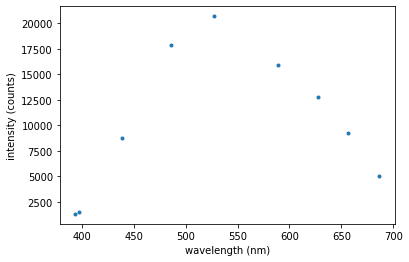

In [32]:
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity (counts)')
plt.plot(df_fl['wavelength'], df_fl['intensity'], '.')

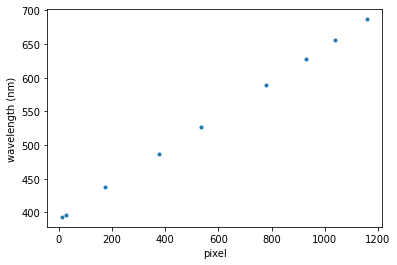

In [33]:
plt.xlabel('pixel')
plt.ylabel('wavelength (nm)')
plt.plot(df_fl['pixel'], df_fl['wavelength'], '.')

In [34]:
from lmfit import models
model = models.LinearModel()
fit = model.fit(x=df_fl['pixel'], data=df_fl['wavelength'])
print(fit.params['slope'])
print(fit.params['intercept'])

<Parameter 'slope', value=0.25525659690182534 +/- 0.00116, bounds=[-inf:inf]>
<Parameter 'intercept', value=390.82847973147994 +/- 0.809, bounds=[-inf:inf]>


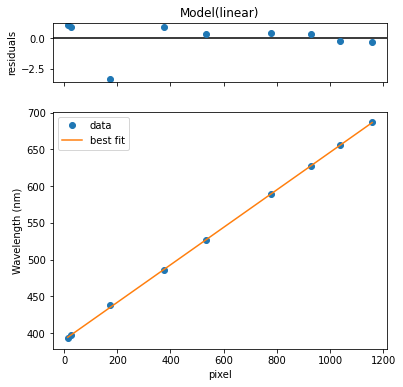

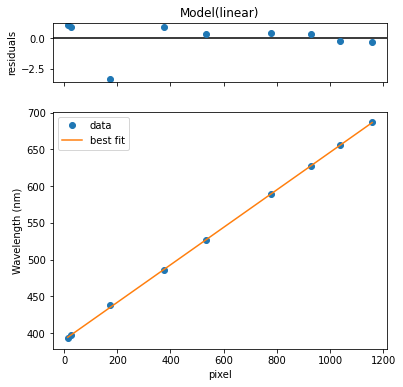

In [35]:
fit.plot(xlabel='pixel', ylabel='Wavelength (nm)')

In [36]:
def pixel_to_wavelength(pixel):
    return fit.values['slope'] * pixel + fit.values['intercept']

In [37]:
len(spectrum)

1391

In [38]:
wavelengths = pixel_to_wavelength(range(len(spectrum)))

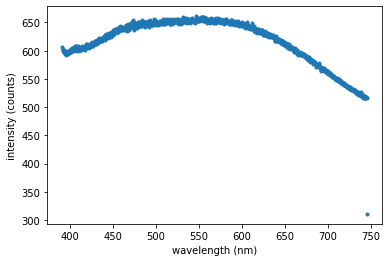

In [39]:
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity (counts)')
plt.plot(wavelengths, spectrum, '.')

In [40]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('flat_alt*') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

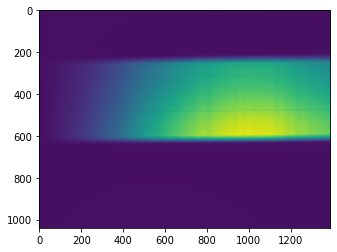

In [41]:
plt.imshow(data_dict['flat_alt-0001.fit'])

In [42]:
data_headers['flat_alt-0001.fit']

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1391 /fastest changing axis                           
NAXIS2  =                 1039 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-11-12T08:26:58' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.020000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   6.45000000000000

## Correcting bias, dark, flat

Currently, our flats are called dark, the readme is incorrect

In [43]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('flat_alt*') ]

flat_dict = dict()
for file in files:
    flat_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

flat_headers = dict()
for x in flat_dict.keys():
    flat_headers[x] = fits.getheader(path + x)

In [44]:
path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/20201109 sky zenith/"
files =  [ p for p in Path(path).glob('skyspectrum*') ]
light_dict = dict()
for file in files:
    light_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.
light_headers = dict()
for x in light_dict.keys():
    light_headers[x] = fits.getheader(path + x)

In [45]:
path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/SunsetLISA/"
files =  [ p for p in Path(path).glob('bias*') ]
bias_dict = dict()
for file in files:
    bias_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.
bias_headers = dict()
for x in bias_dict.keys():
    bias_headers[x] = fits.getheader(path + x)

In [46]:
path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/20201109 sky zenith/"
files =  [ p for p in Path(path).glob('Dark*') ]
dark_dict = dict()
for file in files:
    dark_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.
dark_headers = dict()
for x in dark_dict.keys():
    dark_headers[x] = fits.getheader(path + x)

In [47]:
print(
    light_headers['skyspectrum zenit-0001.fit']['IMAGETYP'],
    flat_headers['flat_alt-0001.fit']['IMAGETYP'],
    dark_headers['Dark-0001.fit']['IMAGETYP'],
    bias_headers['bias-001.fit']['IMAGETYP'],
)

Light Frame Light Frame Dark Frame Bias Frame


Rasjied: Sometimes people don't set the image type. A flat image is characterized by not having absorption lines

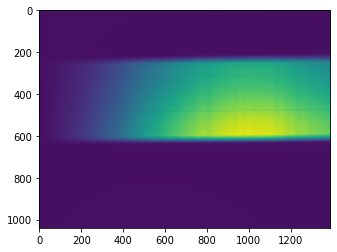

In [48]:
plt.imshow(flat_dict['flat_alt-0001.fit'])

so they are indeed flats.

In [49]:
light_values = [x for x in light_dict.values()]
flat_values = [x for x in flat_dict.values()]
dark_values = [x for x in dark_dict.values()]
bias_values = [x for x in bias_dict.values()]

In [50]:
import numpy as np
light_stack = np.median([ x for x in light_dict.values() ], axis=0)
flat_stack = np.median([ x for x in flat_dict.values() ], axis=0)
# Dark is broken so we ignore it.
dark_stack = np.median([ x for x in dark_dict.values() ], axis=0)
bias_stack = np.median([ x for x in bias_dict.values() ], axis=0)

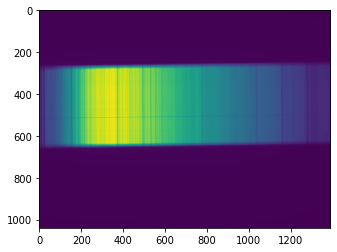

In [51]:
plt.imshow(light_stack)

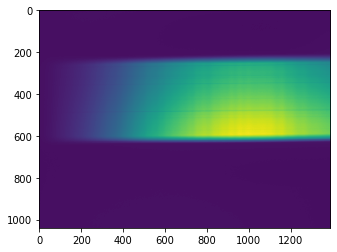

In [52]:
plt.imshow(flat_stack)

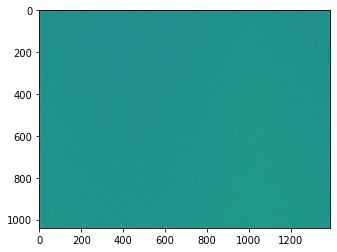

In [53]:
plt.imshow(bias_stack)

$\text{corrected} = \frac{\text{light (sky) frames } - \text{ dark} - \text{ bias}}{\text{flat frames } - \text{ dark} - \text{ bias}}$

But we ignore dark

In [96]:
dark_master = np.mean(dark_stack)
bias_master = np.mean(bias_stack)

In [97]:
flat_master = np.mean([flat - bias_master for flat in flat_stack ])

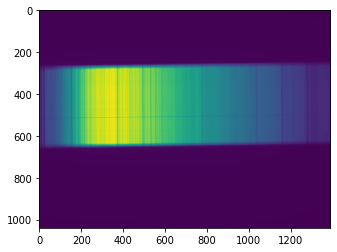

In [98]:
plt.imshow(light_stack)

In [99]:
calibrated = [ (light - bias_master) / flat_master for light in light_stack ]

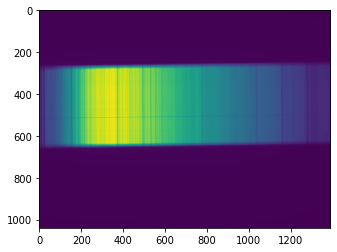

In [100]:
plt.imshow(calibrated)

In [84]:
#spectrum = np.median(calibrated[:], axis=0)
#plt.xticks(range(0, 1500, 100))
#plt.xlabel('pixel')
#plt.ylabel('intensity (counts)')
#plt.plot(spectrum)

In [101]:
spectrum

array([6.91929114e-07, 6.91928309e-07, 6.91928011e-07, ...,
       6.91930744e-07, 6.91930725e-07, 6.91939021e-07])

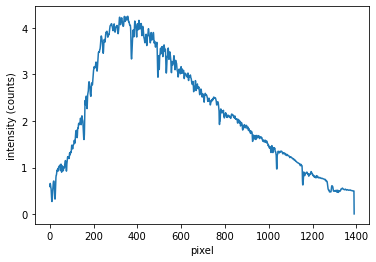

In [105]:
#spectrum = np.median(calibrated[:], axis=0)
spectrum = np.median(calibrated[300:800], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intensity (counts)')
plt.plot(spectrum)